<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/t_SNE_Cosmetics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#import the datasets
df = pd.read_csv("/content/cosmetics.csv")

In [3]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [4]:
df.ndim

2

In [5]:
df.shape

(1472, 11)

In [6]:
df.size

16192

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
# Drop rows with NaN values
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [12]:
# Encoding categorical features using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding 'Label', 'Brand', 'Name', and 'Ingredients' columns
df['Label'] = label_encoder.fit_transform(df['Label'])
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Ingredients'] = label_encoder.fit_transform(df['Ingredients'])

In [13]:
# The features to be used for t-SNE
features = ['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# Separate features from target
X = df[features]


In [14]:
# Standardize the features (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Building the t-SNE Model

In [15]:
#Perplexity: Generally between 5 and 50. The default is 30, but you can experiment.
#Learning rate: Can be between 10 and 1000. The default is 200.
#Number of iterations: Usually set to 1000, but you can try a higher number for better convergence.

In [16]:
# Initialize t-SNE model with selected parameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

In [17]:
#Train the t-SNE model on the scaled features and reduce the data to 2 components (2D space).
# Fit t-SNE on the scaled data
X_tsne = tsne.fit_transform(X_scaled)

# Convert the result into a DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


#Model Evaluation

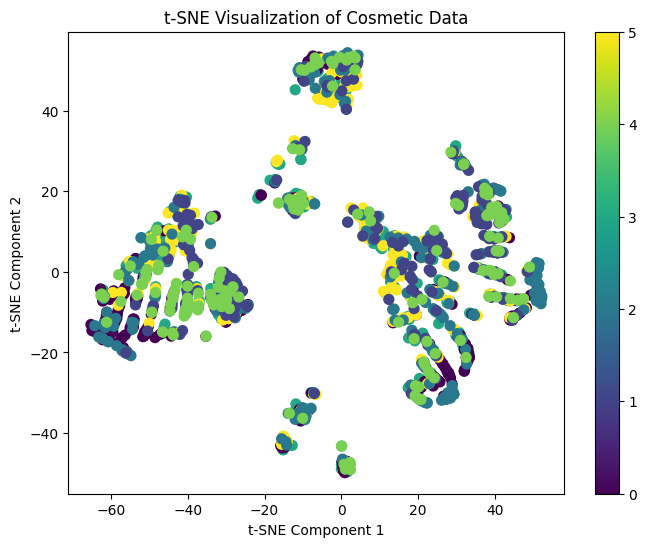

In [18]:
#Visualize the t-SNE output by creating a scatter plot to visualize the clusters and separations in 2D.
# Visualizing the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df['Label'], cmap='viridis', s=50)
plt.colorbar()  # Color bar to show different labels
plt.title('t-SNE Visualization of Cosmetic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

You can observe how different cosmetic products (based on labels) group together.
If the clusters are well-separated, it indicates that the features of these products are significantly different.


Cluster Formation:

There are distinct groups of points, indicating that the dataset contains separable clusters.
Some clusters are tightly packed, suggesting strong similarity within those data points.

Color Coding (Target/Category Representation):

The color gradient (from dark purple to yellow) likely represents different categorical labels or numerical values.
Similar colors are often grouped, implying that t-SNE effectively captured the inherent structure of the data.

Perplexity & Distribution:

A perplexity of 30 balances local and global structure, helping to form well-separated clusters.
Some scattered points could indicate noise or outliers in the dataset.

#Hyperparameter Tuning and Optimization

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


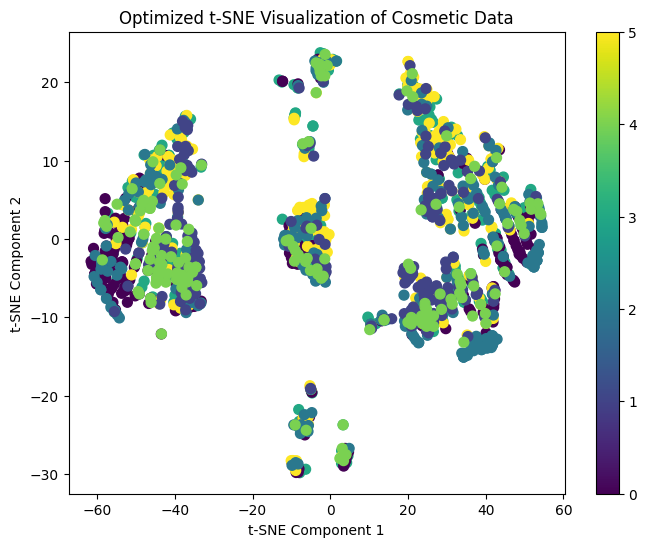

In [19]:
# Try different perplexity values for better results
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=1000, random_state=42)
X_tsne_optimized = tsne.fit_transform(X_scaled)

# Visualize the optimized result
df_tsne_optimized = pd.DataFrame(X_tsne_optimized, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne_optimized['TSNE1'], df_tsne_optimized['TSNE2'], c=df['Label'], cmap='viridis', s=50)
plt.colorbar()  # Color bar to show different labels
plt.title('Optimized t-SNE Visualization of Cosmetic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

More Compact Clusters:

The clusters appear slightly more structured and dense, reducing unnecessary spread.
Points within clusters are closer, indicating better representation of local relationships.

Reduced Noise & Outliers:

Compared to the previous plot, fewer points are scattered far from the main groups.
The increased perplexity helps capture more global relationships in the data.

Cluster Separation Still Exists:

The separation between clusters remains noticeable, suggesting distinct groupings.
Some regions have denser overlap, which might indicate subtle relationships between categories.

 t-SNE does not have a direct cross-validation mechanism like other models, as it’s mainly used for dimensionality reduction and visualization. However, you can use techniques like silhouette score to evaluate cluster separations after applying t-SNE.

In [20]:
from sklearn.metrics import silhouette_score

# Evaluate using silhouette score
score = silhouette_score(X_scaled, df['Label'])
print(f'Silhouette Score: {score}')

Silhouette Score: -0.06012983162841266


A Silhouette Score of -0.06 suggests that the clustering structure in your t-SNE reduced data may not be well-defined.

Interpretation of the Silhouette Score:

Positive Score (0 to 1): Well-clustered data, with clear separation between clusters.

Near Zero (~0): Overlapping clusters, indicating poor separation.

Negative Score (< 0): Possible misclassification, meaning that many points are closer to other clusters than their own.

Higher perplexity captures more global structures but may cause cluster overlap.
Try reducing perplexity to 10 or 20 to see if clusters become more distinct

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


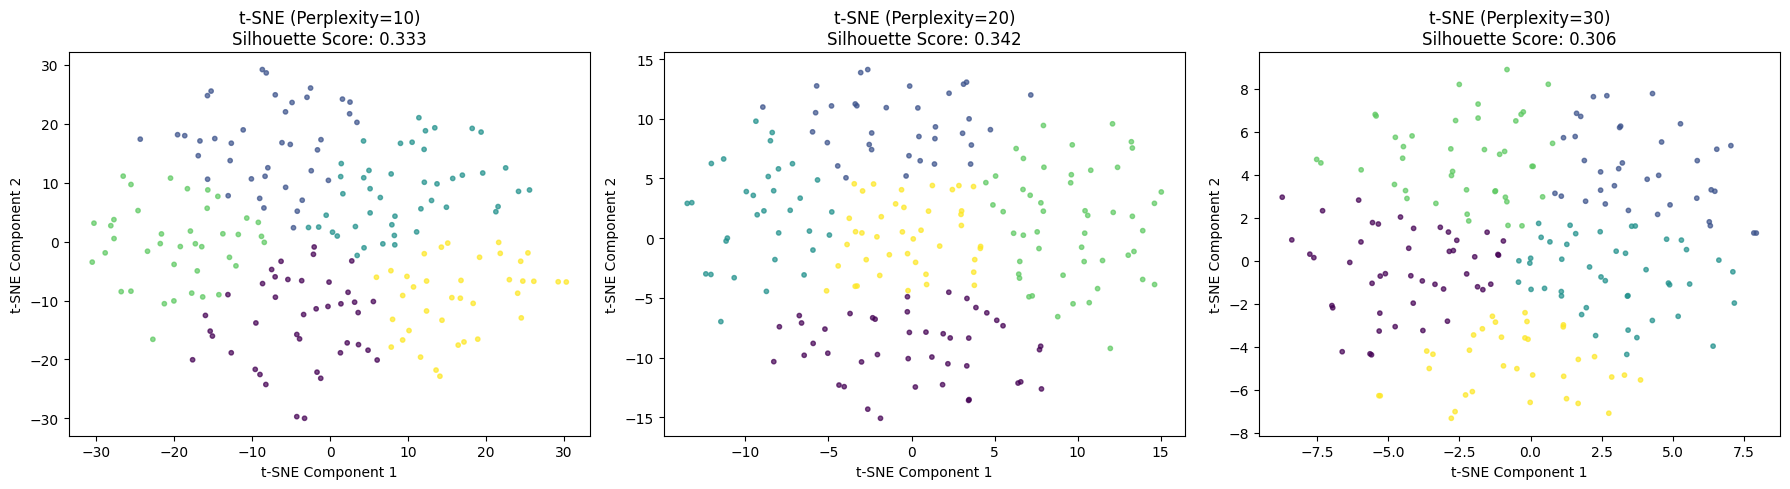

In [32]:
# Defining different perplexity values
perplexities = [10, 20, 30]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, perplexity in enumerate(perplexities):
    try:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=200, n_iter=1000, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        kmeans = KMeans(n_clusters=5, random_state=42)
        cluster_labels = kmeans.fit_predict(X_tsne)

        sil_score = silhouette_score(X_tsne, cluster_labels)

        axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=10, alpha=0.7)
        axes[i].set_title(f't-SNE (Perplexity={perplexity})\nSilhouette Score: {sil_score:.3f}')
        axes[i].set_xlabel('t-SNE Component 1')
        axes[i].set_ylabel('t-SNE Component 2')

    except Exception as e:
        print(f"Error with Perplexity {perplexity}: {e}")

plt.tight_layout()
plt.show()

Perplexity = 10: The clusters are relatively spread out, but the silhouette score is moderate (0.333), which indicates that the clusters aren’t strongly distinct. This suggests that the local structure isn’t fully captured here.

Perplexity = 20: The silhouette score is slightly higher (0.342), and the clusters appear to be somewhat more separated compared to perplexity = 10. However, some of the clusters still look a bit overlapping, meaning it's still not perfect.

Perplexity = 30: The silhouette score drops to 0.306, and while the clusters are more compact compared to the other two, they also seem less distinct overall. The result here suggests that the global structure is being overemphasized and the local relationships might not be captured as well.


